In [1]:
from ipynb.fs.full.Functions import *

# 2.4D Find H0 

In [43]:
#The average value of D1 is 0.180802986334043
#The average value of D2 is 1.4499601605512522
# Since D2 > 3*D1, we only use semi-diurnal tides. 
deltaT = 5 #s 
deltaX = 4e3 #m
x_r = 120e3 #m
Lbasin = 1.5*x_r #m
B0 = 5e3 #m 
M2amp = 1.4499601605512522
Cd = 2.5e-3
discharge = 0 
B_r = 300 #m
Lb = -x_r/np.log (B_r /B0) #1/m 

In [44]:
print(Lb)
# print(Lb*1.5)

42652.85522840181


In [4]:
def optimize_function(x, h0):
#     print(h0)
    simulation_dict = simulation(deltaT=deltaT, deltaX=deltaX, Lbasin=Lbasin, Lb=Lb, B0=B0,
                             H0=h0, M2amp=M2amp, discharge=discharge, Cd=Cd, constB=False, x_r=x_r, B_r=B_r)
    start = int((len(simulation_dict["Time"]) / 2))
    amplitudes=get_full_fit(simulation_dict["Position"], simulation_dict["Time"][start:], simulation_dict["Water_level"][:, start:])
    # only returns within 0-0.75*x_r
    return amplitudes["M2 Amplitude"][simulation_dict["Position"][:-1] <= 0.75*x_r]

In [5]:
# x = np.arange(0, 0.75*x_r, deltaX)
# data = np.ones(len(x))*M2amp

# popt, pcov = optimize.curve_fit(optimize_function, x, data)

In [6]:
# print(popt)
popt=8.6865365

In [7]:
h0=popt
simulation_dict = simulation(deltaT=deltaT, deltaX=deltaX, Lbasin=Lbasin, Lb=Lb, B0=B0,
                         H0=h0, M2amp=M2amp, discharge=discharge, Cd=Cd, constB=False, x_r=x_r, B_r=B_r)

# Exercise 1 

# i & ii 

In [8]:
amplitudes = [] #Make empty array of amplitudes
array = np.array([0.66, 1, 1.5]) * popt #range of amplitudes we want
for H in array:
    simulation_dict_2 = simulation(deltaT=deltaT, deltaX=deltaX, Lbasin=Lbasin, Lb=Lb, B0=B0, 
                         H0=H, M2amp=M2amp, discharge=discharge, Cd=Cd, constB=False, x_r=x_r, B_r=B_r)
    start = int((len(simulation_dict_2["Time"]) / 2))
    amplitudes_2=get_full_fit(simulation_dict_2["Position"], simulation_dict_2["Time"][start:], simulation_dict_2["Water_level"][:, start:])
    amplitudes.append(amplitudes_2)

In [9]:
u_amplitudes = [] #Make empty array of amplitudes
array = np.array([0.66, 1, 1.5]) * popt #range of amplitudes we want
for H in array:
    simulation_dict_2 = simulation(deltaT=deltaT, deltaX=deltaX, Lbasin=Lbasin, Lb=Lb, B0=B0, 
                         H0=H, M2amp=M2amp, discharge=discharge, Cd=Cd, constB=False, x_r=x_r, B_r=B_r)
    start = int((len(simulation_dict_2["Time"]) / 2))
    amplitudes_2=get_full_fit(simulation_dict_2["Position"], simulation_dict_2["Time"][start:], simulation_dict_2["Velocity"][:, start:])
    u_amplitudes.append(amplitudes_2)

C:\Users\Lasse\Documents\Climate Physics\Morphodynamics Tidal systems\P2\Morphodynamics2\Functions.ipynb:206: RuntimeWarning: divide by zero encountered in true_divide
  "        t: time array of data to be fitted\n",
C:\Users\Lasse\Documents\Climate Physics\Morphodynamics Tidal systems\P2\Morphodynamics2\Functions.ipynb:222: RuntimeWarning: divide by zero encountered in true_divide
  "    Cn, Dn = np.split(par[1:], 2)\n",


In [241]:
(u_amplitudes)

[{'Mean Amplitude': array([-1.42120295e-006, -7.64633731e-002, -7.08296463e-002,
         -6.61393709e-002, -6.21399167e-002, -5.86721377e-002,
         -5.56329890e-002, -5.29546315e-002, -5.05934369e-002,
         -4.85211781e-002, -4.67176877e-002, -4.51693327e-002,
         -4.38665026e-002, -4.28009558e-002, -4.19640887e-002,
         -4.13457847e-002, -4.09334497e-002, -4.07112516e-002,
         -4.06593931e-002, -4.07532304e-002, -4.09623893e-002,
         -4.12503960e-002, -4.15751261e-002, -4.18882981e-002,
         -4.21306365e-002, -4.22247072e-002, -4.20709263e-002,
         -4.15413319e-002, -4.04684826e-002, -3.86323260e-002,
         -3.57474290e-002, -2.92963499e-002, -2.36378817e-002,
         -1.87085311e-002, -1.44649668e-002, -1.08730676e-002,
         -7.89982816e-003, -5.50683586e-003, -3.64643814e-003,
         -2.26093229e-003, -1.28391539e-003, -6.43328691e-004,
         -2.65350940e-004, -7.70201067e-005, -9.74326622e-006,
          4.94065646e-324]),
  'M2 Am

In [242]:
m2amp = [] #Filter out m2 amplitudes
for idx, val in enumerate(u_amplitudes):
    m2amp.append(amplitudes[idx]["M2 Amplitude"])

In [243]:
print(m2amp)

[array([1.44996016, 1.39674121, 1.35074151, 1.31051548, 1.27508161,
       1.24373502, 1.21594025, 1.19126264, 1.16931827, 1.14973922,
       1.13215619, 1.11618258, 1.10141104, 1.08741681, 1.07375703,
       1.05997526, 1.0456043 , 1.03017261, 1.013205  , 0.99422643,
       0.97277053, 0.94840469, 0.92077181, 0.88961905, 0.85478864,
       0.81621743, 0.77398819, 0.72837674, 0.68000463, 0.63024318,
       0.58192352, 0.54930967, 0.53183742, 0.52794101, 0.53512672,
       0.55048134, 0.57109455, 0.59442126, 0.61835589, 0.64124871,
       0.6618161 , 0.67908876, 0.69235635, 0.70117573, 0.70540154]), array([1.44996016, 1.45367947, 1.4576937 , 1.46190346, 1.46619986,
       1.47046299, 1.47456077, 1.47834656, 1.48165776, 1.48431418,
       1.48611767, 1.48685239, 1.48628567, 1.48416927, 1.48024048,
       1.47422379, 1.46583841, 1.45481335, 1.44090937, 1.42393927,
       1.40377235, 1.38032803, 1.35358866, 1.3236438 , 1.29076881,
       1.25550597, 1.2187102 , 1.18169728, 1.14643432, 1.11

Text(0, 0.5, 'M2 Amplitude in m')

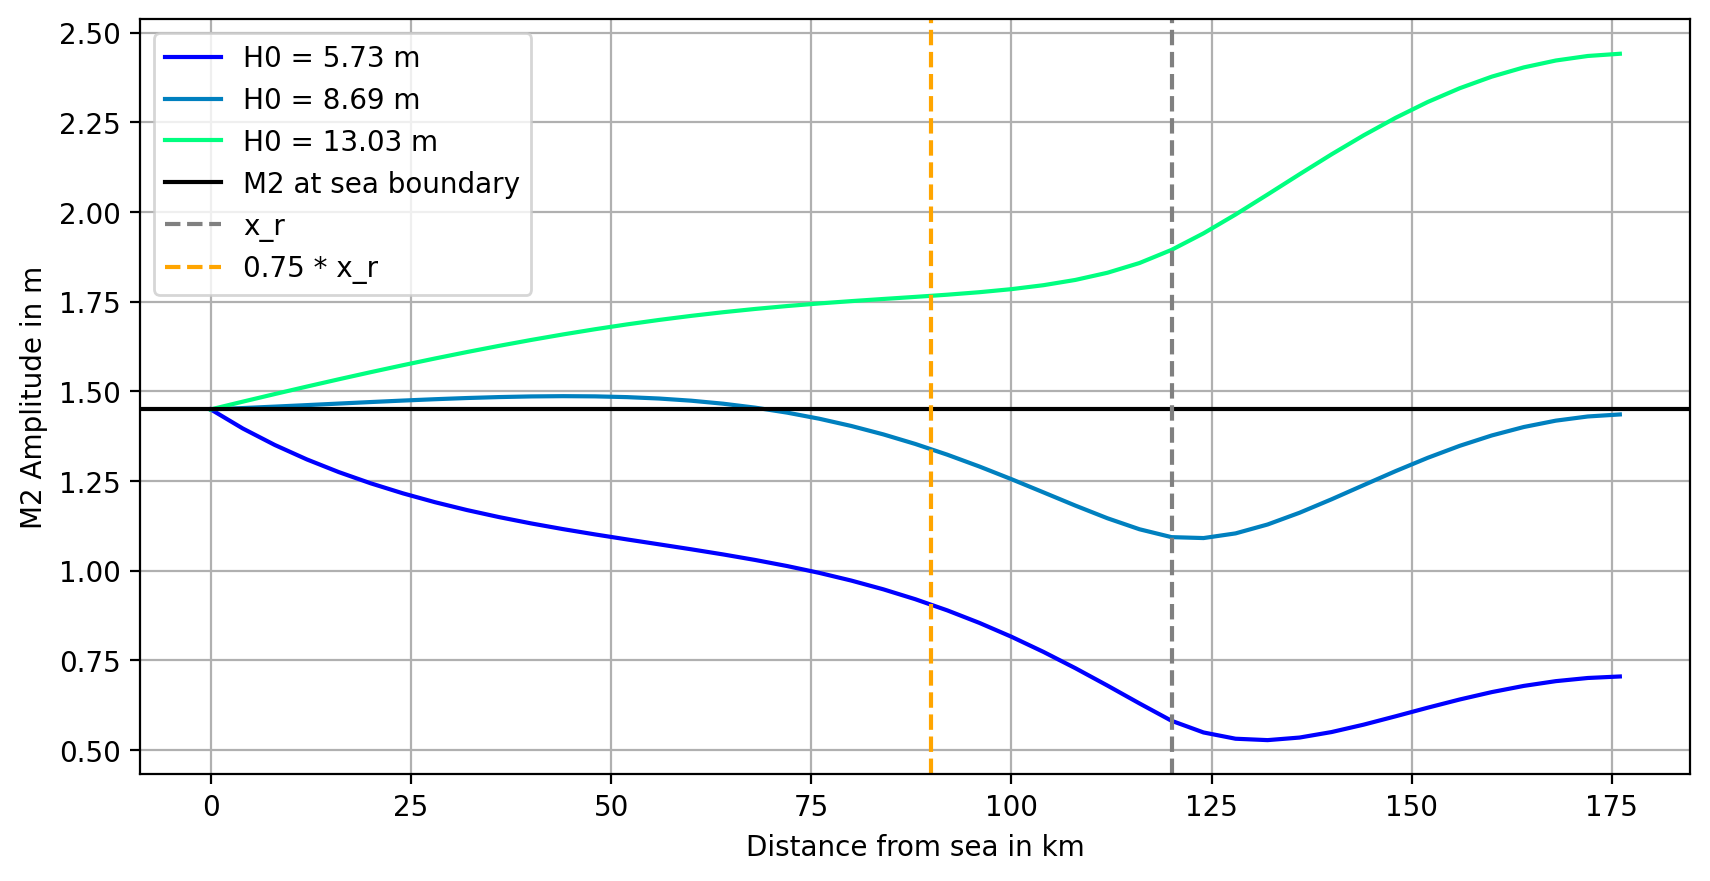

In [11]:
cmap = matplotlib.cm.get_cmap('winter')
rgba = cmap(0.5)
N = len(m2amp) - 1

x_arr = simulation_dict["Position"]
for idx, val in enumerate(m2amp): #plot m2 amplitudes for different h
    colorfloat = idx/N
    rgb = cmap(colorfloat)
    plt.plot(x_arr[:-1]/1000, val, label=f'H0 = {round(array[idx], 2)} m', color=rgb)
plt.axhline(M2amp, c='black', label='M2 at sea boundary')
plt.axvline(x_r/1000, c="gray", ls="--", label='x_r')
plt.axvline(0.75*x_r/1000, c="orange", ls="--", label='0.75 * x_r')
plt.legend()
plt.grid(True)
plt.xlabel("Distance from sea in km")
plt.ylabel("M2 Amplitude in m")

# iii 

In [12]:
#Use H0, 0.66 * H0 and 1.5 * H0 
#Determine phase speed (C) 
#Phase = kx --> Determine k from linear fit phase against x 
#Get angular velocity (omega)f from function 
# C = omega/k 
# Discuss difference between depths 
# Discuss deviation from c = sqrt(gh)

In [13]:
m2phase = [] #Filter out m2 phases 
for idx, val in enumerate(amplitudes):
    m2phase.append(amplitudes[idx]["M2 Phase"])

Text(0, 0.5, 'M2 Phase in rad')

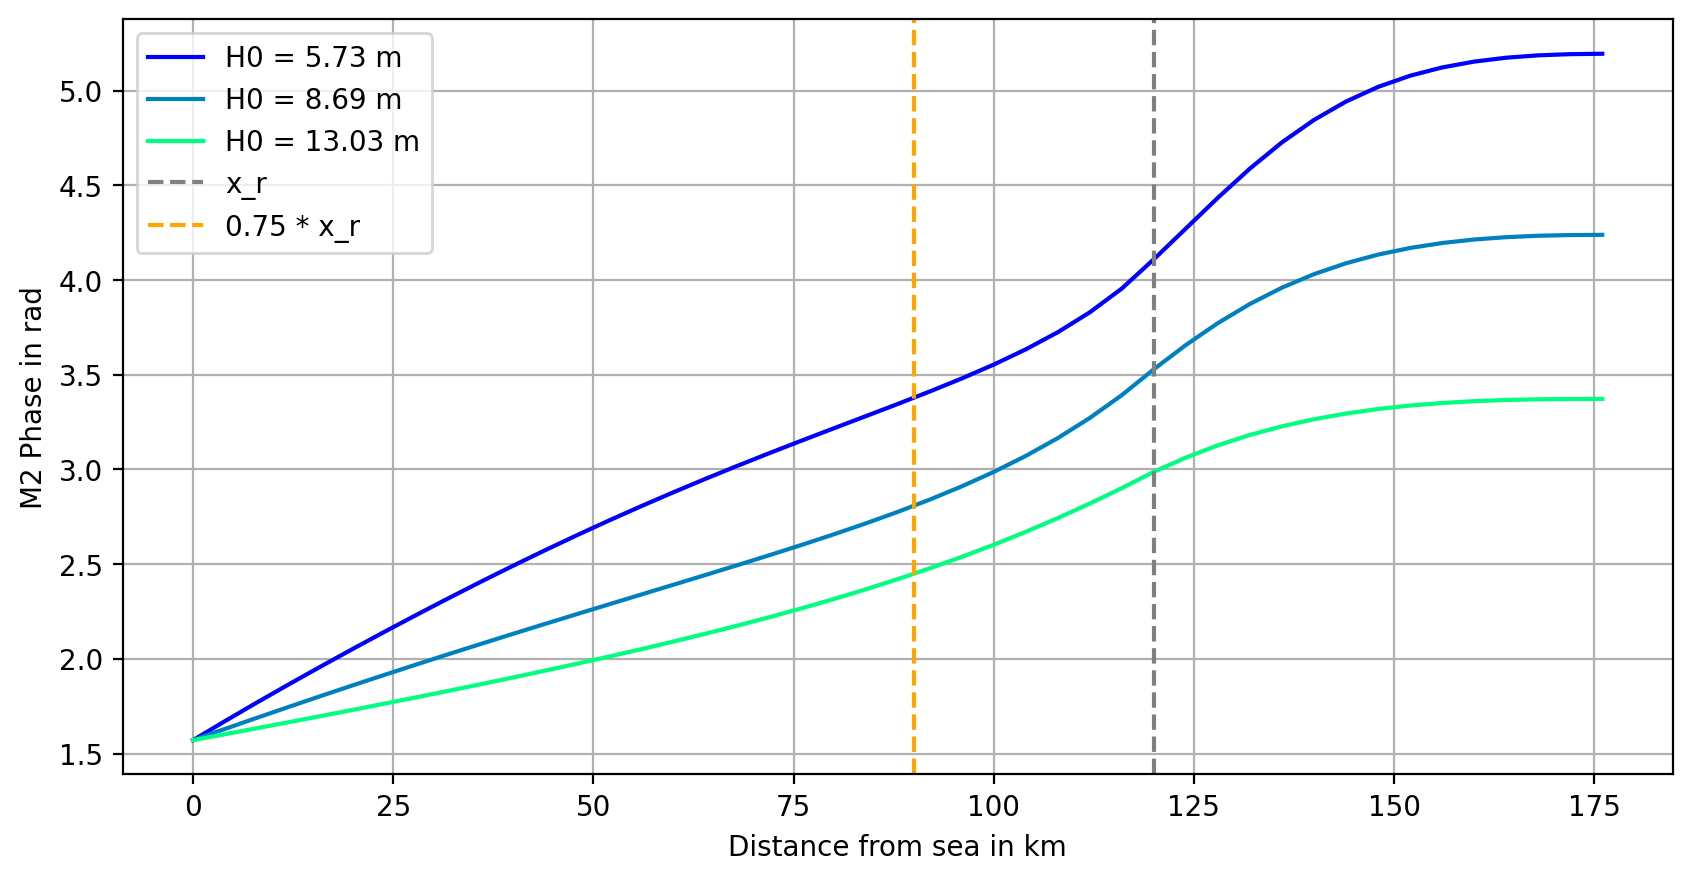

In [197]:
# normal phase plot
x_arr = simulation_dict["Position"]
for idx, val in enumerate(m2phase): #plot m2 amplitudes for different h
    # shift values up for nice plot but also easier fitting
    val[val <= 0] = val[val <=0] + 2 * np.pi
    colorfloat = idx/N
    rgb = cmap(colorfloat)
    plt.plot(x_arr[:-1]/1000, val, label=f'H0 = {round(array[idx], 2)} m', color=rgb)
plt.axvline(x_r/1000, c="gray", ls="--", label='x_r')
plt.axvline(0.75*x_r/1000, c="orange", ls="--", label='0.75 * x_r')
plt.legend()
plt.grid(True)
plt.xlabel("Distance from sea in km")
plt.ylabel("M2 Phase in rad")

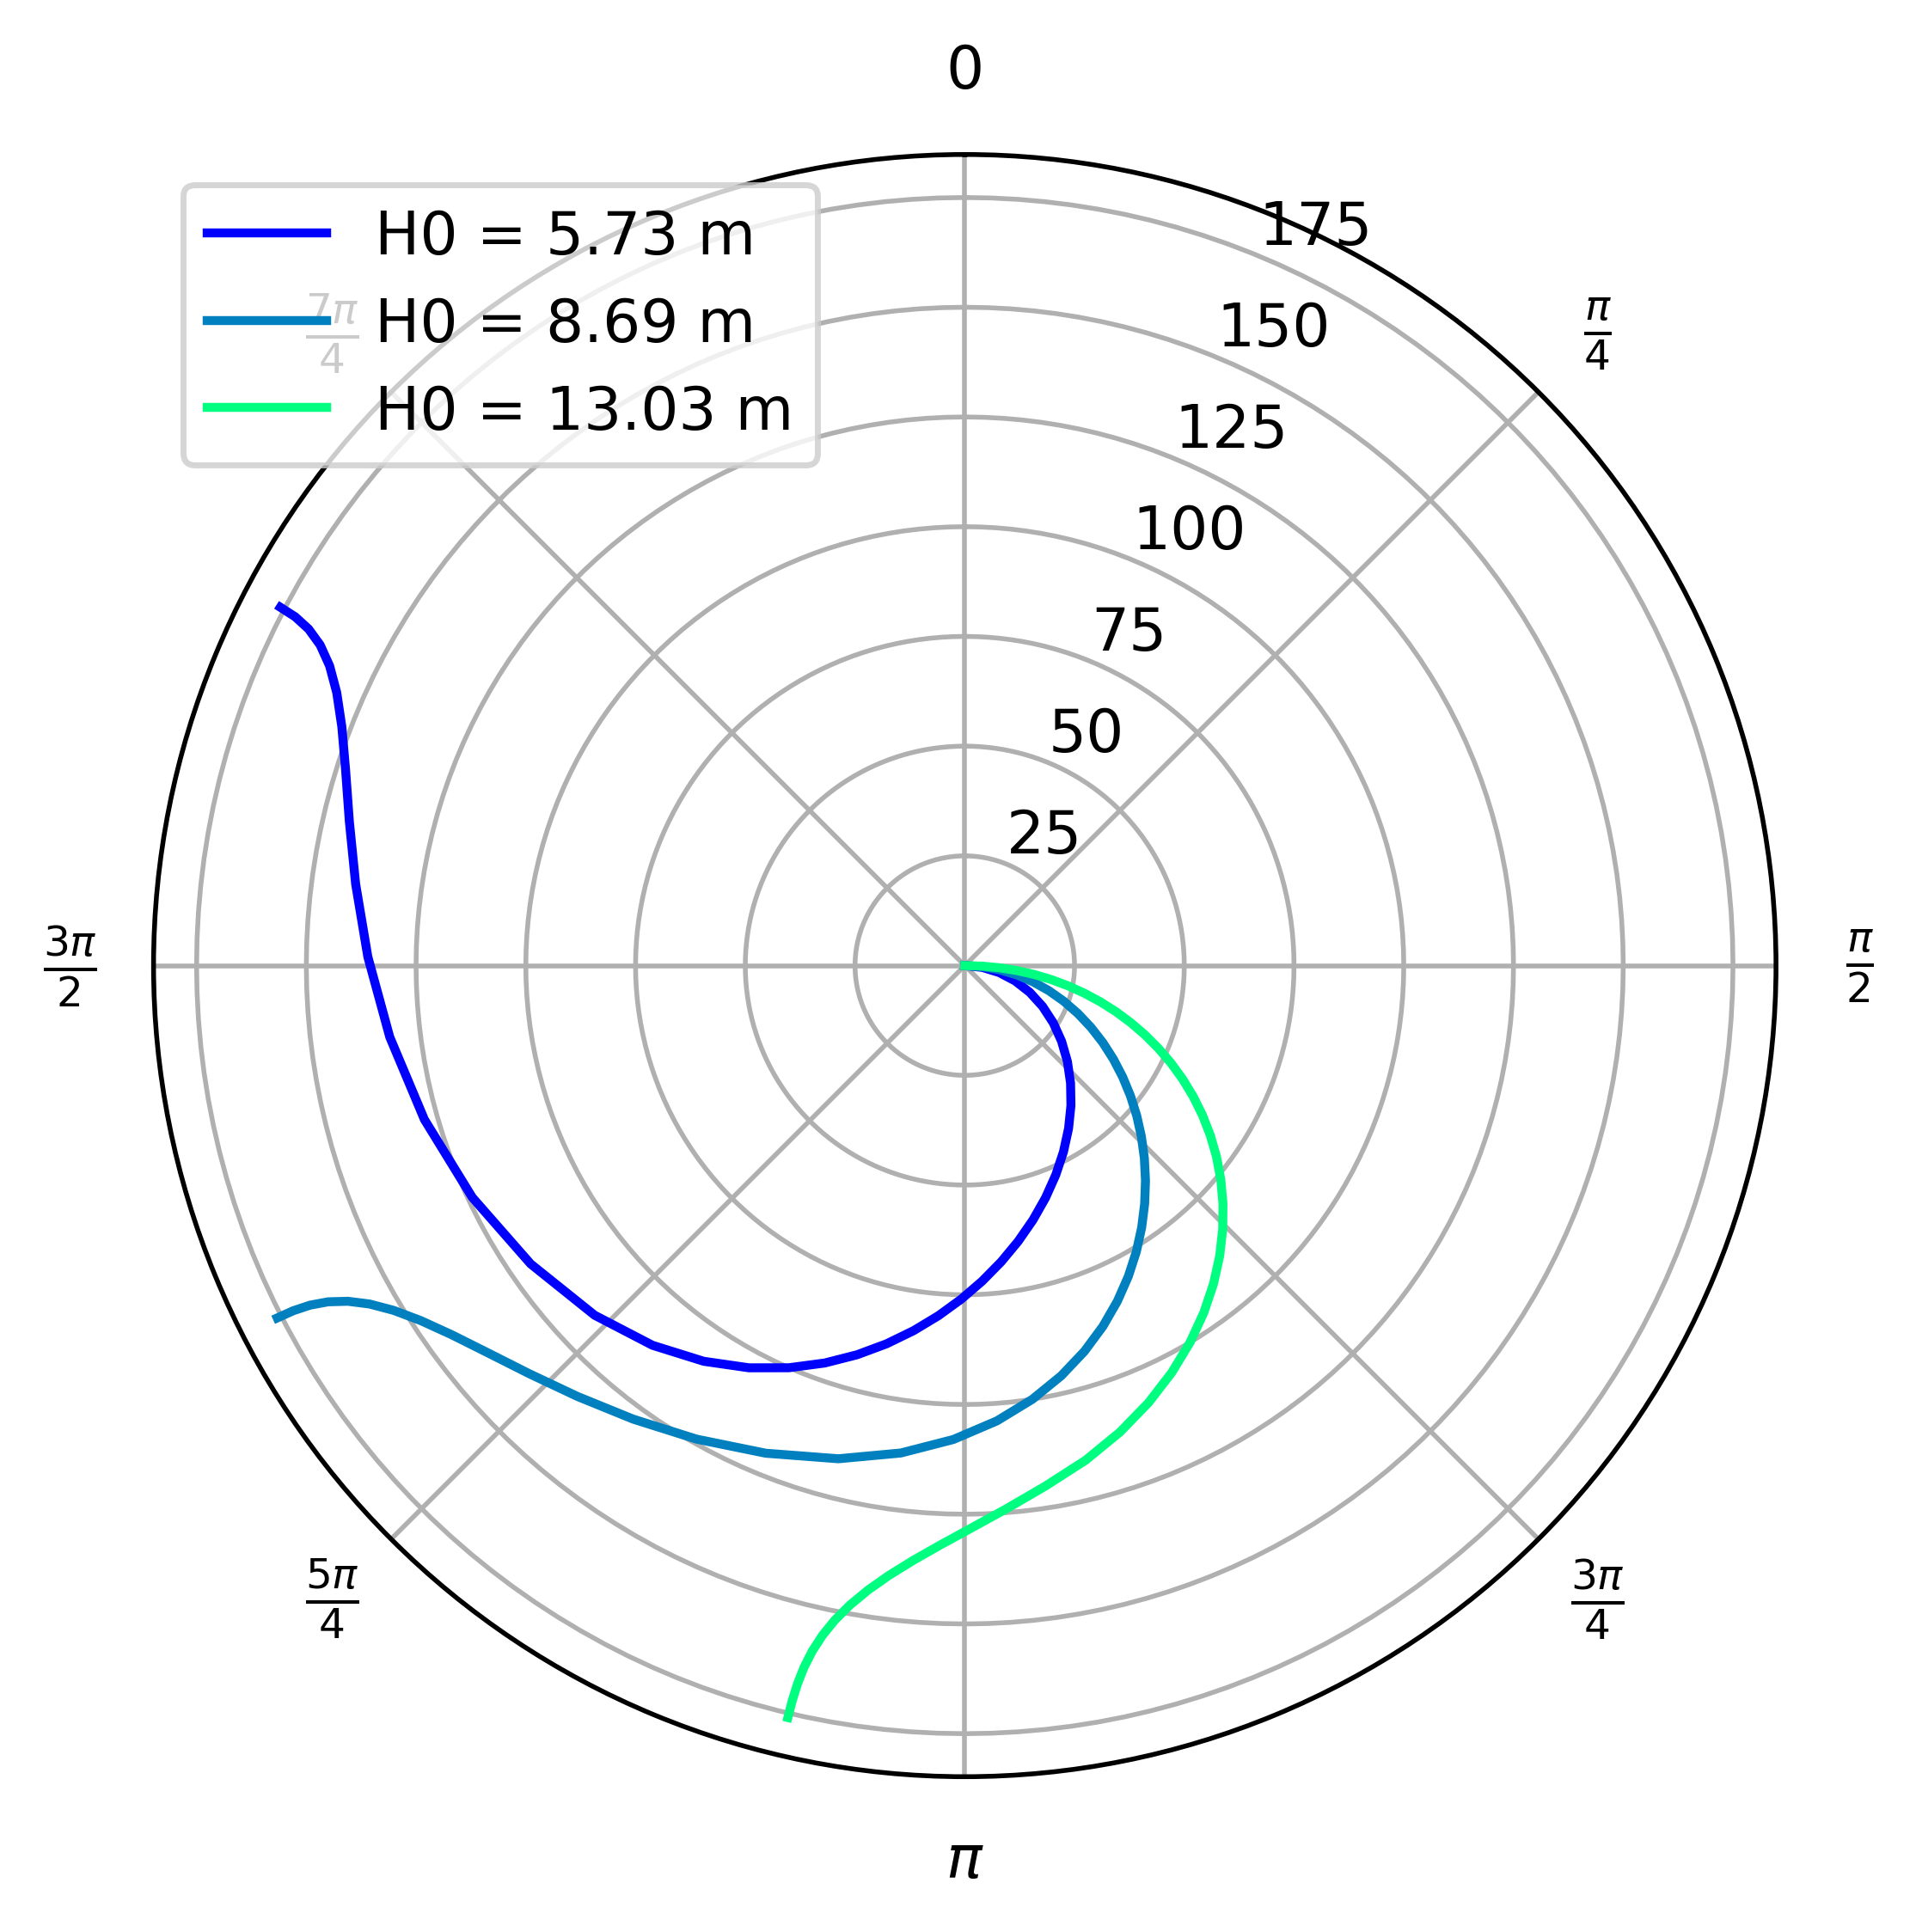

In [15]:
# polar phase plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},dpi=500)
equals = np.linspace(0, 2*np.pi, 200)#, endpoint=False) #np.arange(24)

x_arr = simulation_dict["Position"]
for idx, val in enumerate(m2phase): #plot m2 amplitudes for different h
    colorfloat = idx/N
    rgb = cmap(colorfloat)
    ax.plot(val, x_arr[:-1]/1000, label=f'H0 = {round(array[idx], 2)} m', color=rgb)
    
# plt.legend()
plt.grid(True)

xT=plt.xticks()[0]
xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
    r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
plt.xticks(xT, xL)


# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       
plt.legend(loc=2)
plt.show()

In [16]:
#TODO: Check if the code here works, I haven't actually run this part yet. 
def fasespeed(x, k):
    phi = 0.5*np.pi + k * x
    return phi 

x = np.arange(0, 0.75*x_r, deltaX)
x_arr = simulation_dict["Position"]
k = []
for idx, val in enumerate(amplitudes):
    amp = amplitudes[idx]["M2 Phase"][simulation_dict["Position"][:-1] <= 0.75*x_r]
    kopt, pcov = optimize.curve_fit(fasespeed, x,  amp)
    k.append(kopt[0])
    

In [229]:
print(omega)

0.00014056342969081848


Text(0, 0.5, 'M2 Phase in rad')

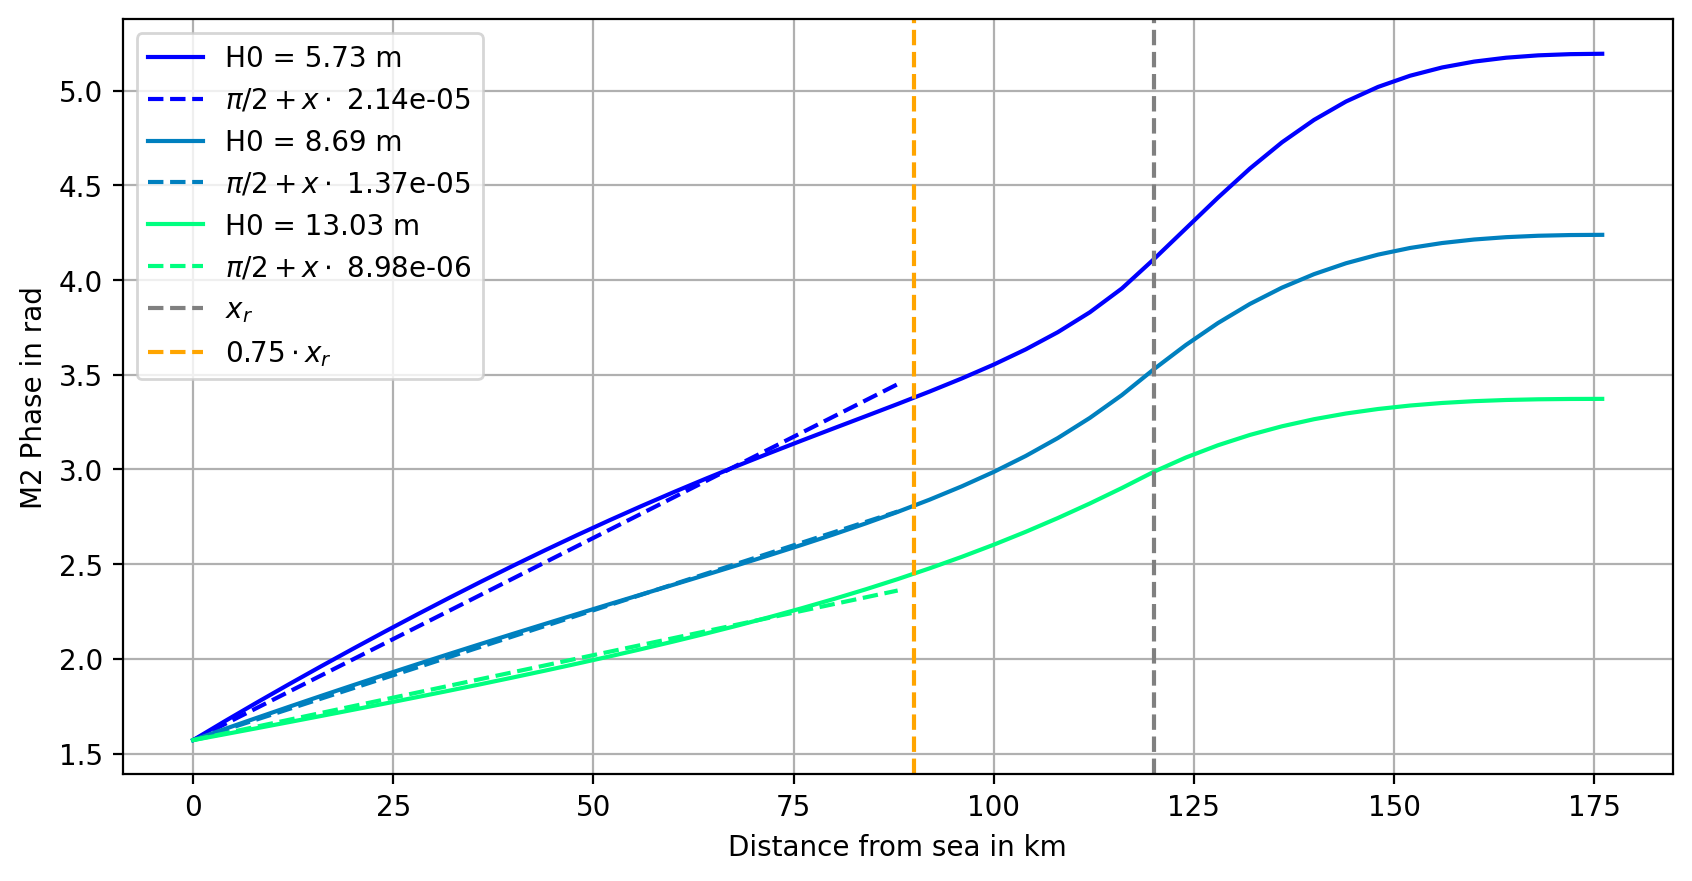

In [18]:
# normal phase plot
x_arr = simulation_dict["Position"]
for idx, val in enumerate(m2phase): #plot m2 amplitudes for different h
    # shift values up for nice plot but also easier fitting
    val[val <= 0] = val[val <=0] + 2 * np.pi
    colorfloat = idx/N
    rgb = cmap(colorfloat)
    plt.plot(x_arr[:-1]/1000, val, label=f'H0 = {round(array[idx], 2)} m', color=rgb)
    plt.plot(x/1000, fasespeed(x, k[idx]), '--', label='$ \pi/2 +  x \cdot $ {:0.2e}'.format(k[idx]), color=rgb)
plt.axvline(x_r/1000, c="gray", ls="--", label='$x_r$')
plt.axvline(0.75*x_r/1000, c="orange", ls="--", label='$0.75 \cdot x_r$')
plt.legend()
plt.grid(True)
plt.xlabel("Distance from sea in km")
plt.ylabel("M2 Phase in rad")

In [19]:
omega = 2 * np.pi / Tm2 

C = []
for idx, val in enumerate(amplitudes):
    C_model = omega/k[idx]
    print('C_model for h0 =', round(array[idx], 2) , 'is', C_model, 'm/s')
    C.append(C_model)

for idx, val in enumerate(amplitudes):
    C_theory = np.sqrt(g*array[idx])
    print('C_theory for h0=', round(array[idx], 2), 'is', C_theory, 'm/s')

C_model for h0 = 5.73 is 6.58163801980772 m/s
C_model for h0 = 8.69 is 10.24952479273243 m/s
C_model for h0 = 13.03 is 15.659170971917115 m/s
C_theory for h0= 5.73 is 7.49945659517408 m/s
C_theory for h0= 8.69 is 9.231192938347677 m/s
C_theory for h0= 13.03 is 11.305856208067569 m/s


# Exercise 2 

0.9451543503038431
54.15335526083957


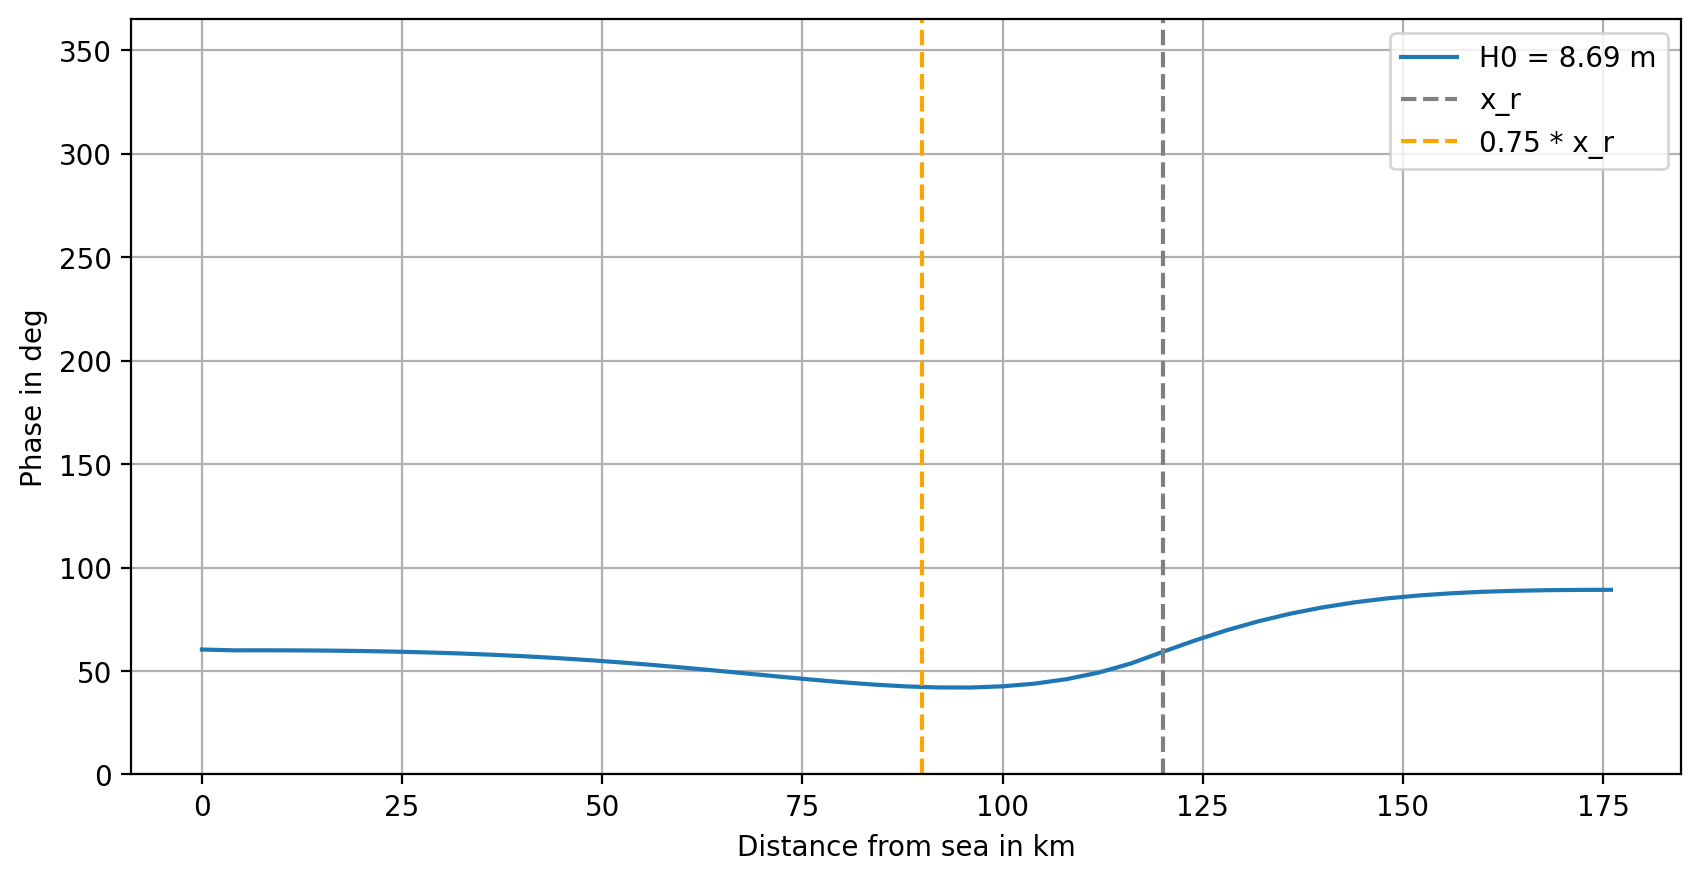

In [20]:
m2phase_u = [] #Filter out m2 phases 
for idx, val in enumerate(u_amplitudes):
    m2phase_u.append(u_amplitudes[idx]["M2 Phase"])

phase_diff = abs(m2phase_u[1][:-1]-m2phase[1])
# print(phase_diff)
plt.plot(x_arr[:-1]/1000, phase_diff/np.pi * 180, label=f'H0 = {round(array[1], 2)} m')
plt.ylabel('Phase in deg')
plt.xlabel("Distance from sea in km")
plt.axvline(x_r/1000, c="gray", ls="--", label='x_r')
plt.axvline(0.75*x_r/1000, c="orange", ls="--", label='0.75 * x_r')
plt.legend()
plt.ylim(-0, 365)
plt.grid()

print(np.mean(phase_diff[0:len(x)]))
print(np.mean(phase_diff[0:len(x)])/np.pi * 180)

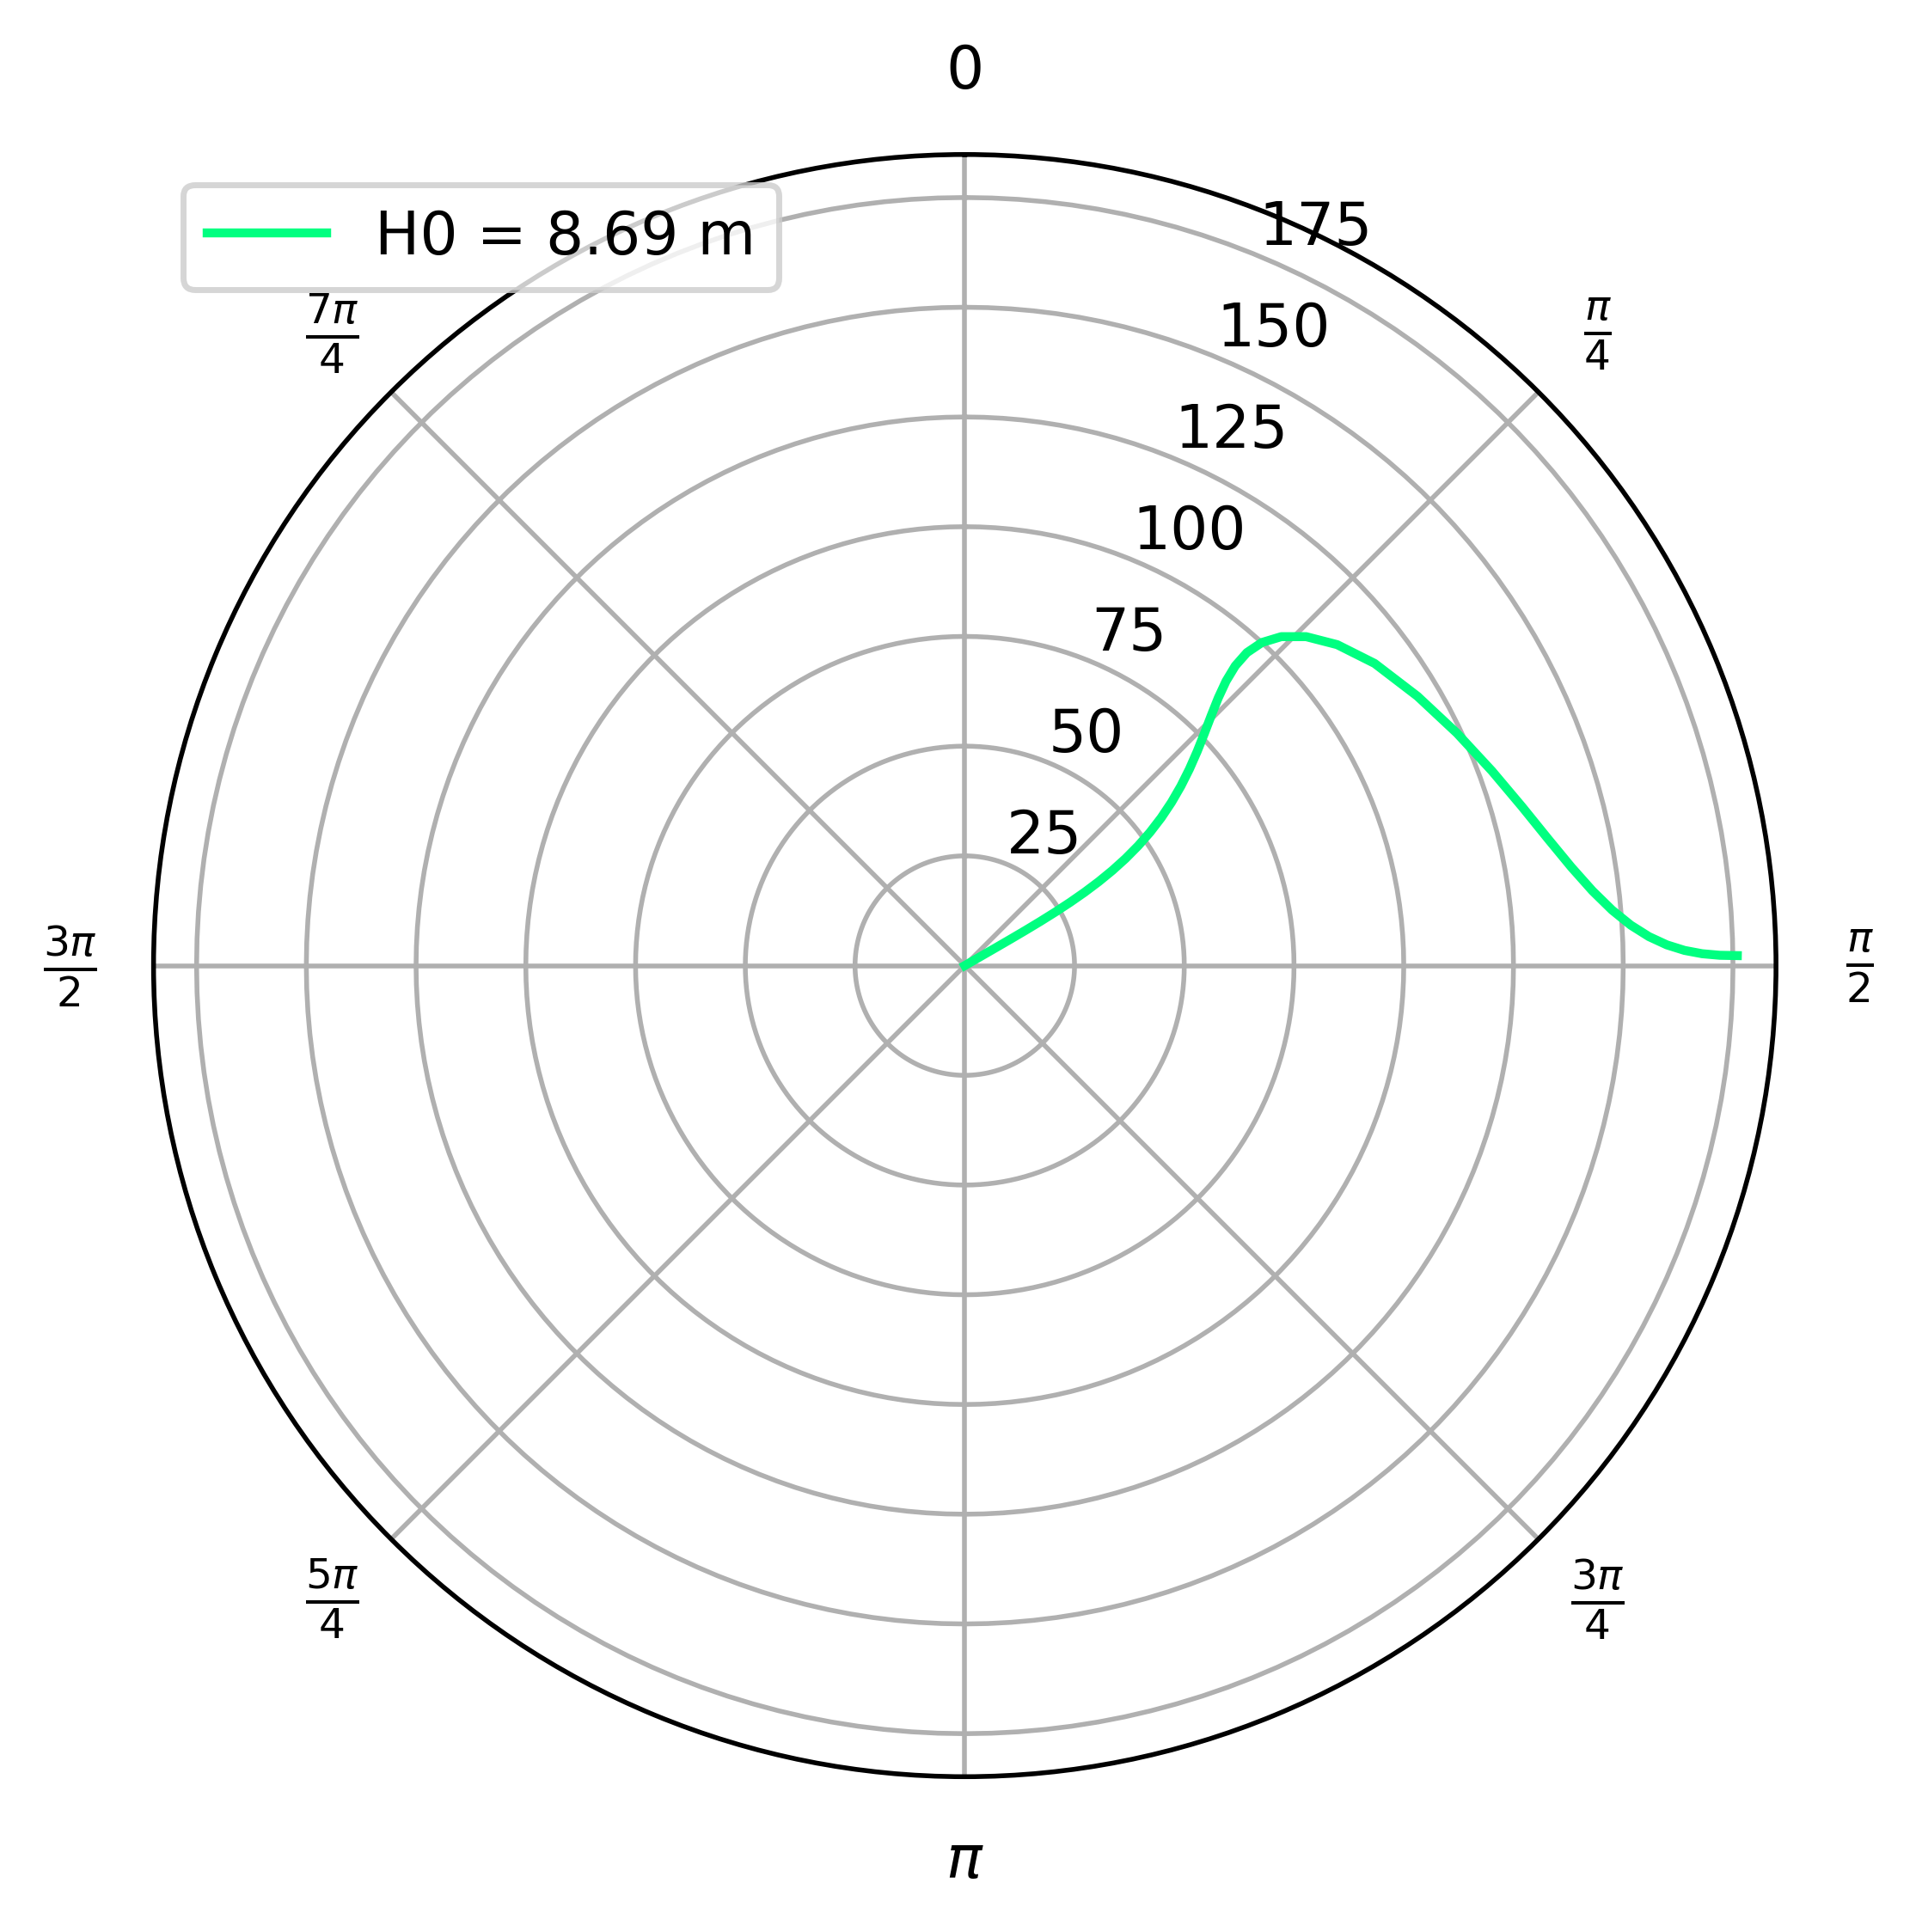

In [21]:
# polar phase plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},dpi=500)
equals = np.linspace(0, 2*np.pi, 200)#, endpoint=False) #np.arange(24)

ax.plot(phase_diff, x_arr[:-1]/1000, label=f'H0 = {round(array[1], 2)} m', color=rgb)

# plt.legend()
plt.grid(True)

xT=plt.xticks()[0]
xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
    r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
plt.xticks(xT, xL)


# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       
plt.legend(loc=2)
plt.show()

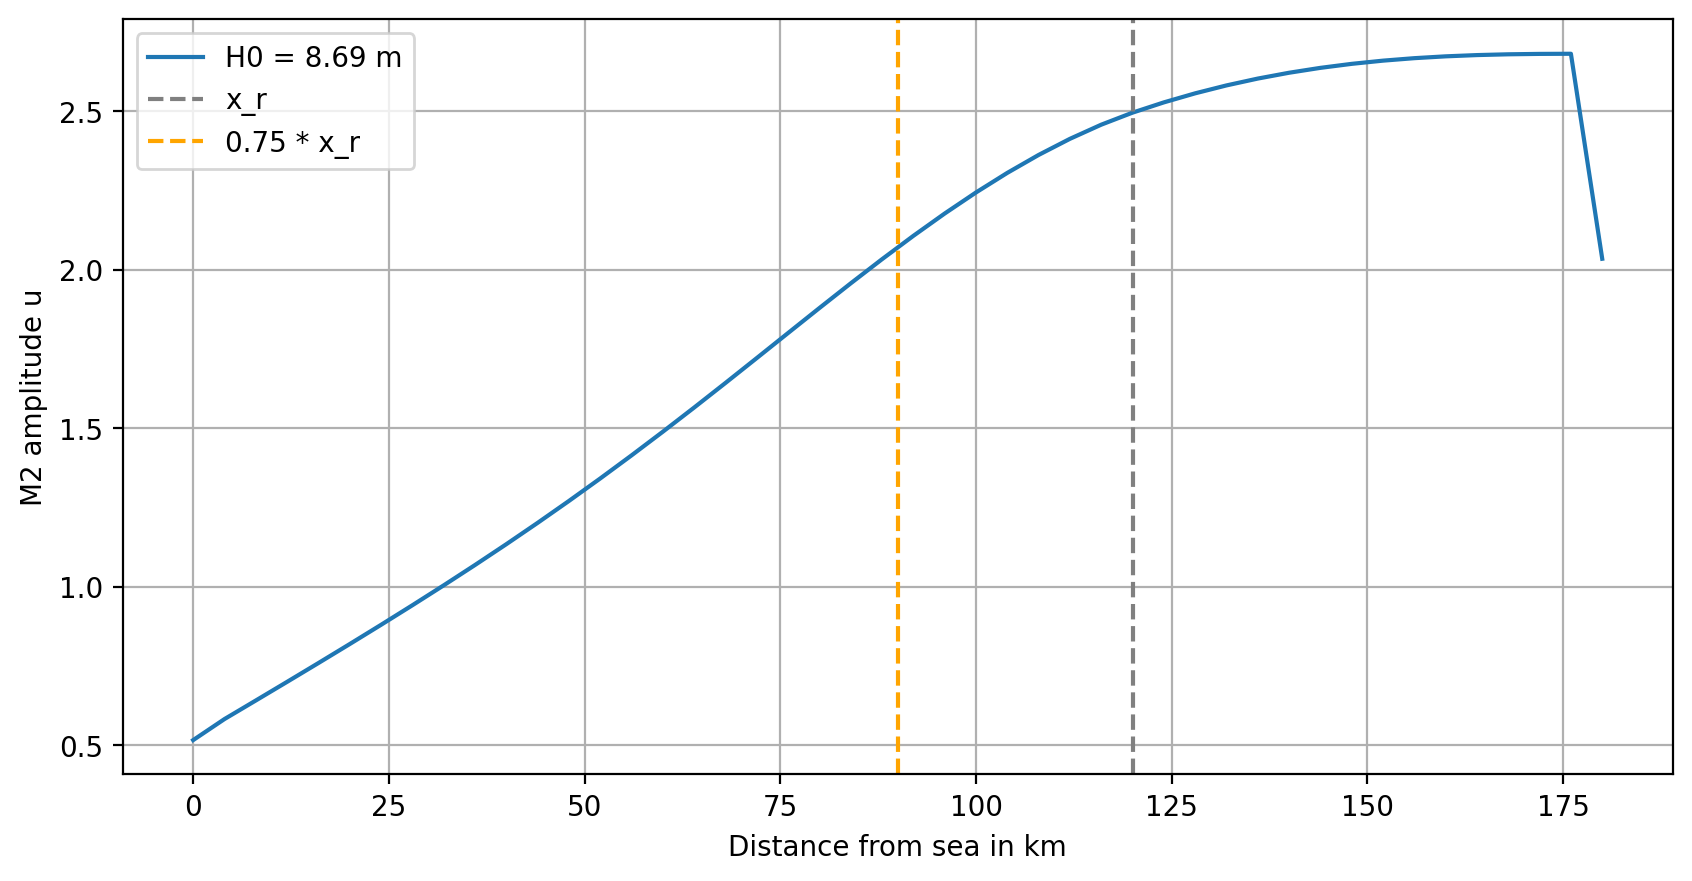

In [22]:
plt.plot(x_arr/1000, m2phase_u[1], label=f'H0 = {round(array[1], 2)} m')
plt.ylabel('M2 amplitude u')
plt.xlabel("Distance from sea in km")
plt.axvline(x_r/1000, c="gray", ls="--", label='x_r')
plt.axvline(0.75*x_r/1000, c="orange", ls="--", label='0.75 * x_r')
plt.grid()
plt.legend()

In [23]:
#Only for H0 & only use the first 0.75 percent of estuary. So Lbasin = 0.75 x_r. Use input parameters 1.iii
print('k is', k[1])
print('C is', C[1])

print('Magnitude U is', np.amax(simulation_dict["Velocity"]), 'm/s')


#TODO: Determine magnitude U and phase difference

k is 1.3714141146376557e-05
C is 10.24952479273243
Magnitude U is 1.193227863953961 m/s


# Exercise 3 

In [24]:
a0amp_u = [] #Filter out a0 amplitudes of u
for idx, val in enumerate(u_amplitudes):
    a0amp_u.append(amplitudes[idx]["Mean Amplitude"])

Text(0, 0.5, 'Tidally averaged velocity in m/s')

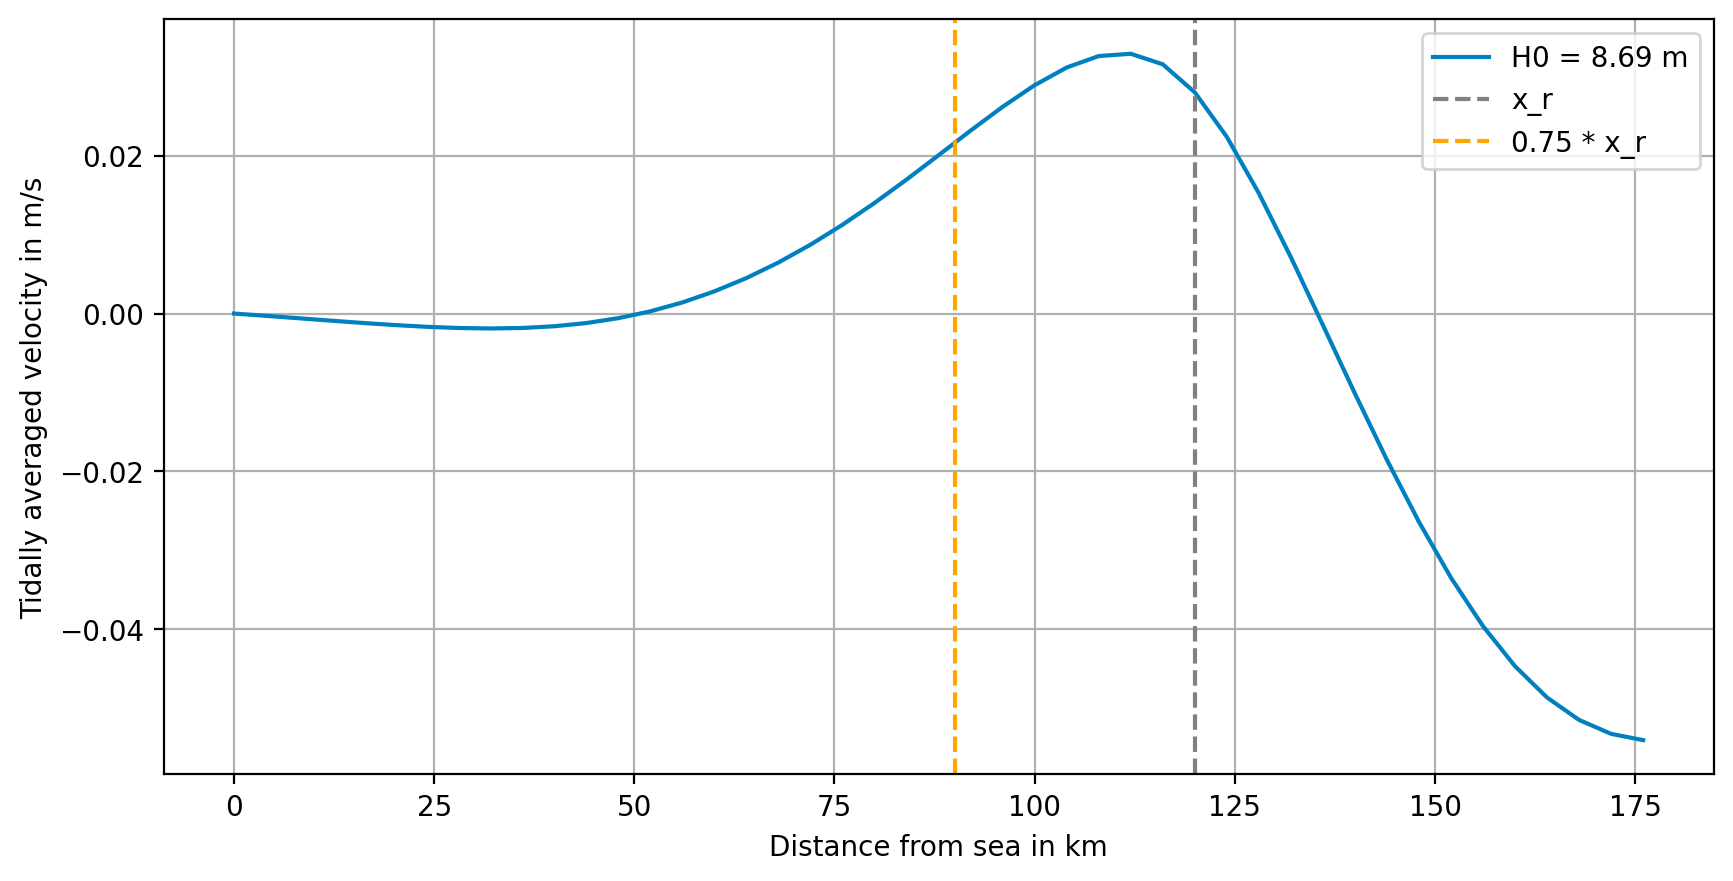

In [25]:
cmap = matplotlib.cm.get_cmap('winter')
rgba = cmap(0.5)
N = len(a0amp_u) - 1

x_arr = simulation_dict["Position"]
for idx, val in enumerate(a0amp_u):
    pass
idx=1
colorfloat = idx/N
rgb = cmap(colorfloat)
plt.plot(x_arr[:-1]/1000, val, label=f'H0 = {round(array[idx], 2)} m', color=rgb)
plt.axvline(x_r/1000, c="gray", ls="--", label='x_r')
plt.axvline(0.75*x_r/1000, c="orange", ls="--", label='0.75 * x_r')
plt.legend()
plt.grid(True)
plt.xlabel("Distance from sea in km")
plt.ylabel("Tidally averaged velocity in m/s")

# Exercise 4 

In [189]:
# create simulations
Lb = 42652.85
lb_amplitudes = [] #Make empty array of amplitudes
Lb_list = np.array([0.66, 1, 1.5]) * Lb


In [190]:
print(Lb_list)

[28150.881 42652.85  63979.275]


In [176]:
for L in Lb_list:
    B0 = B_r*np.exp(x_r/L) #m 
    simulation_dict_2 = simulation(deltaT=deltaT, deltaX=deltaX, Lbasin=Lbasin, Lb=L, B0=B0, 
                         H0=h0, M2amp=M2amp, discharge=discharge, Cd=Cd, constB=False, x_r=x_r, B_r=B_r)
    start = int((len(simulation_dict_2["Time"]) / 2))
    amplitudes_2=get_full_fit(simulation_dict_2["Position"], simulation_dict_2["Time"][start:], simulation_dict_2["Water_level"][:, start:])
    lb_amplitudes.append(amplitudes_2)

In [191]:
print(L)

64299.171


# i 

In [47]:
lb_m2amp = [] #Filter out m2 amplitudes
for idx, val in enumerate(lb_amplitudes):
    lb_m2amp.append(lb_amplitudes[idx]["M2 Amplitude"])

Text(0, 0.5, 'M2 Amplitude in m')

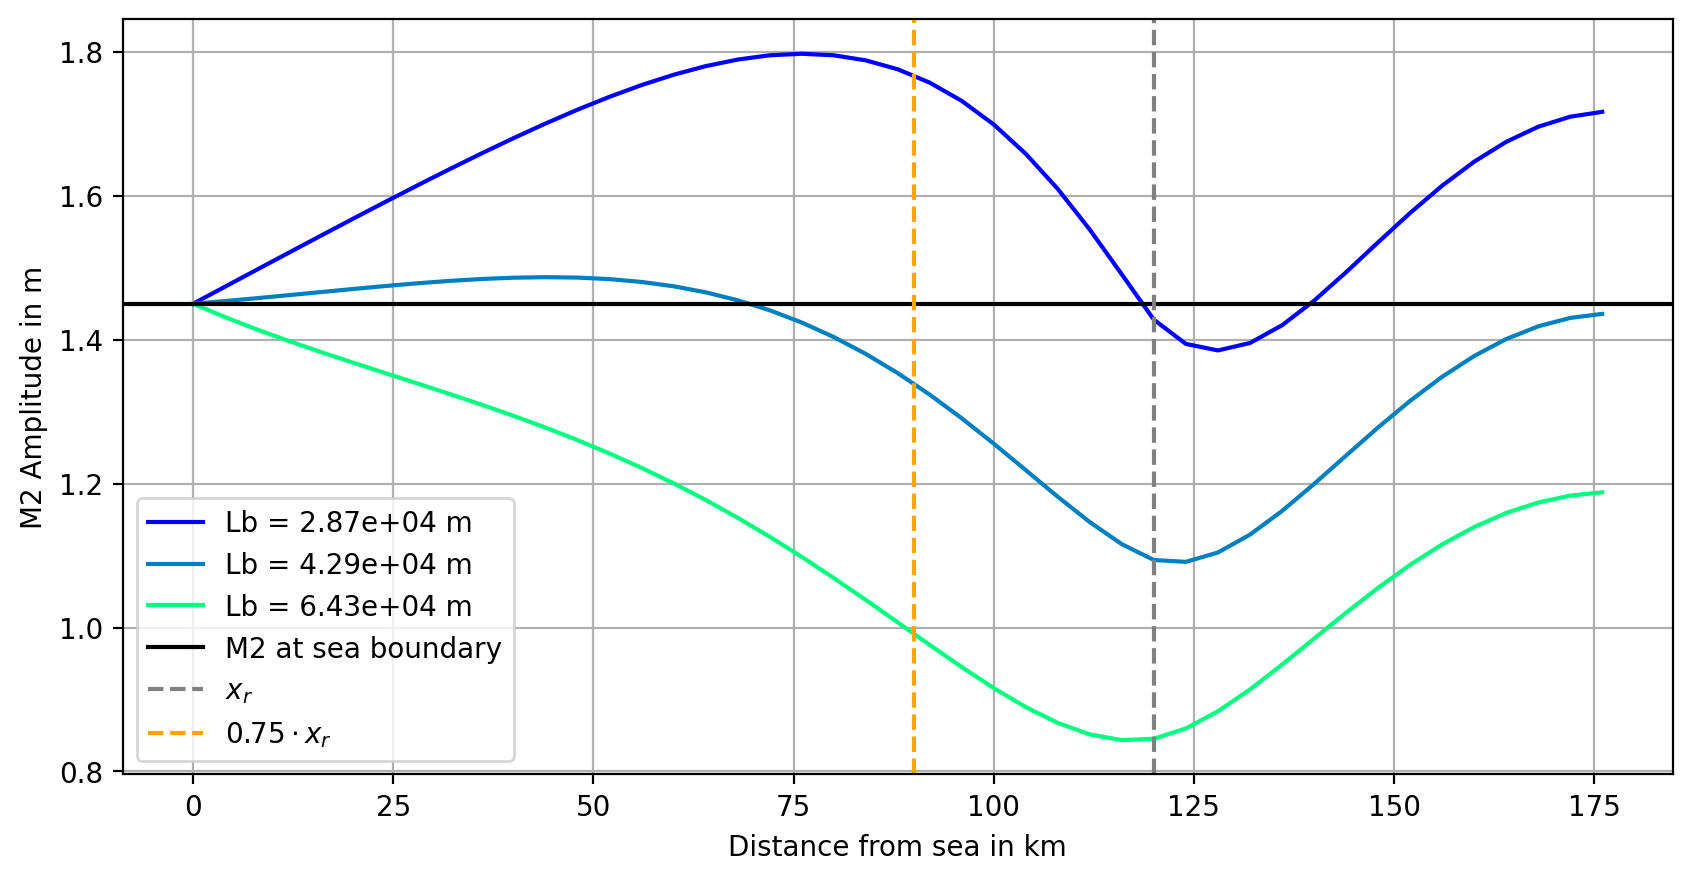

In [187]:
cmap = matplotlib.cm.get_cmap('winter')
rgba = cmap(0.5)
N = len(lb_m2amp) - 1

x_arr = simulation_dict["Position"]
for idx, val in enumerate(lb_m2amp): #plot m2 amplitudes for different h
    colorfloat = idx/N
    rgb = cmap(colorfloat)
    plt.plot(x_arr[:-1]/1000, val, label='Lb = {:0.2e} m'.format(Lb_list[idx]), color=rgb)
plt.axhline(M2amp, c='black', label='M2 at sea boundary')
plt.axvline(x_r/1000, c="gray", ls="--", label='$x_r$')
plt.axvline(0.75*x_r/1000, c="orange", ls="--", label='$0.75 \cdot x_r$')
plt.legend()
plt.grid(True)
plt.xlabel("Distance from sea in km")
plt.ylabel("M2 Amplitude in m")

# ii

In [192]:
print(Lb)

42652.85


In [202]:
# create simulations
Lb = 42625.114
lb_u_amplitudes = [] #Make empty array of amplitudes
Lb_list = np.array([0.67, 1, 1.5]) * Lb
for L_fit in Lb_list:
    B = B_r*np.exp(x_r/L_fit) #m 
    simulation_dict_2 = simulation(deltaT=deltaT, deltaX=deltaX, Lbasin=Lbasin, Lb=L_fit, B0=B, 
                         H0=h0, M2amp=M2amp, discharge=discharge, Cd=Cd, constB=False, x_r=x_r, B_r=B_r)
    start = int((len(simulation_dict_2["Time"]) / 2))
    amplitudes_2=get_full_fit(simulation_dict_2["Position"], simulation_dict_2["Time"][start:], simulation_dict_2["Velocity"][:, start:])
    lb_u_amplitudes.append(amplitudes_2)

C:\Users\Lasse\Documents\Climate Physics\Morphodynamics Tidal systems\P2\Morphodynamics2\Functions.ipynb:206: RuntimeWarning: divide by zero encountered in true_divide
  "        t: time array of data to be fitted\n",
C:\Users\Lasse\Documents\Climate Physics\Morphodynamics Tidal systems\P2\Morphodynamics2\Functions.ipynb:222: RuntimeWarning: divide by zero encountered in true_divide
  "    Cn, Dn = np.split(par[1:], 2)\n",


In [195]:
print(B0)

1939.2536857742653


In [164]:
lb_u_m2amp = [] #Filter out m2 amplitudes
for idx, val in enumerate(lb_u_amplitudes):
    lb_u_m2amp.append(lb_u_amplitudes[idx]["M2 Amplitude"])

In [186]:
print(lb_u_m2amp)

[array([0.68940547, 0.69063901, 0.69487071, 0.69816213, 0.70041218,
       0.7015191 , 0.70138372, 0.69991472, 0.69703647, 0.69270056,
       0.6869022 , 0.67970348, 0.67126556, 0.66189289, 0.65209266,
       0.64265107, 0.63472364, 0.62992684, 0.63040025, 0.63878702,
       0.6580752 , 0.69128013, 0.74104836, 0.80934769, 0.89738742,
       1.00579775, 1.13501565, 1.28581557, 1.46003998, 1.66192683,
       1.90135475, 0.46666743, 0.44115037, 0.41404409, 0.38541152,
       0.35533016, 0.32389087, 0.29119711, 0.25736377, 0.22251589,
       0.18678715, 0.15031827, 0.1132554 , 0.07574802, 0.03794662,
       0.        ]), array([0.84650921, 0.8458645 , 0.8427495 , 0.8392795 , 0.83545869,
       0.83130956, 0.82687565, 0.82222442, 0.81745029, 0.81267748,
       0.80806269, 0.80379731, 0.80010897, 0.79726171, 0.79555493,
       0.79532051, 0.79691682, 0.80071961, 0.80710951, 0.81645564,
       0.82909668, 0.84532268, 0.86536066, 0.88936468, 0.91741061,
       0.94949474, 0.9855383 , 1.0254039

Text(0, 0.5, 'M2 Velocity amplitude in m/s')

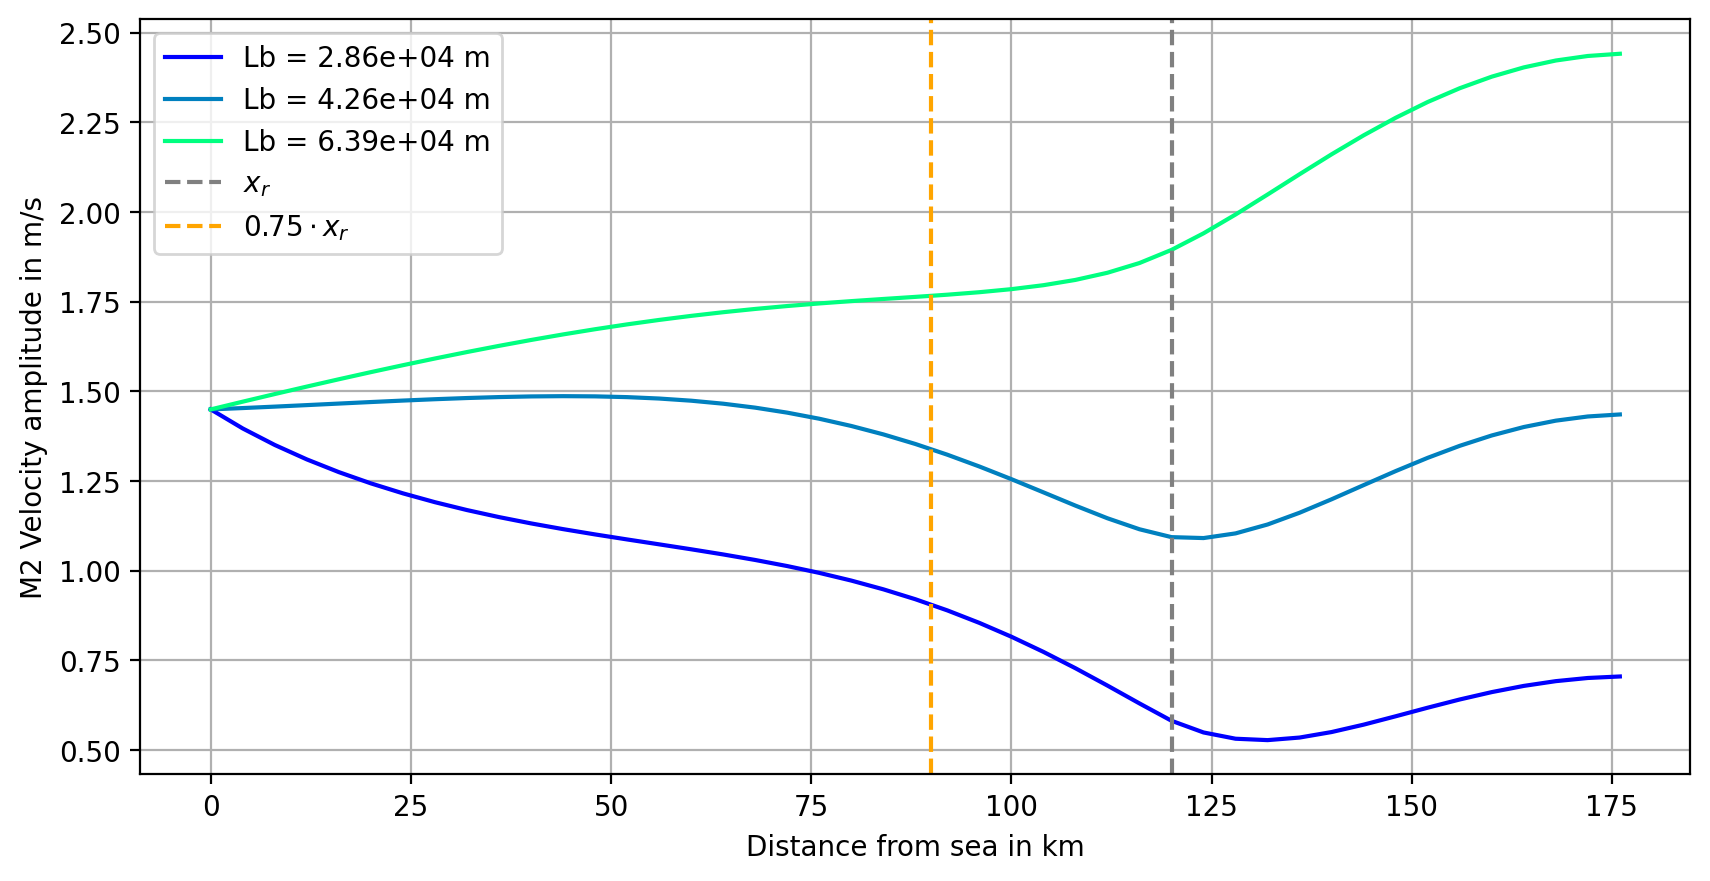

In [245]:
cmap = matplotlib.cm.get_cmap('winter')
rgba = cmap(0.5)
N = len(lb_u_m2amp) - 1

x_arr = simulation_dict["Position"]

for idx, val in enumerate(m2amp): #plot m2 amplitudes for different h
    colorfloat = idx/N
    rgb = cmap(colorfloat)
    plt.plot(x_arr[:-1]/1000, val, label='Lb = {:0.2e} m'.format(Lb_list[idx]), color=rgb)
plt.axvline(x_r/1000, c="gray", ls="--", label='$x_r$')
plt.axvline(0.75*x_r/1000, c="orange", ls="--", label='$0.75 \cdot x_r$')
plt.legend()
plt.grid(True)
plt.xlabel("Distance from sea in km")
plt.ylabel("M2 Velocity amplitude in m/s")

# iii

In [167]:
lb_m2phase = [] #Filter out m2 phases
for idx, val in enumerate(lb_amplitudes):
    lb_m2phase.append(lb_amplitudes[idx]["M2 Phase"])

In [168]:
print(Lb)

42866.114


In [180]:
print(k_lb)

[8.552986965653893e-06, 1.3714140333922688e-05, 1.8106211803284075e-05]


In [ ]:
for idx, phase in enumerate(m2phase):
    
    phase[phase <= 0] = phase[phase <=0] + 2 * np.pi
    plt.plot(x[:-1]/1e3, phase[:-1],label='Lb = {:0.2e} m'.format(Lb_list[idx]))
    
plt.axvline(x_r/1000, c="gray", ls="--", label='$x_r$')
plt.axvline(0.75*x_r/1000, c="orange", ls="--", label='$0.75 \cdot x_r$')  
plt.legend()
plt.grid()

In [211]:
lb_u_amplitudes = [] 

Lb_list = np.array([0.67, 1, 1.5]) * Lb

for L_fit in Lb_list:
    B = B_r*np.exp(x_r/L_fit) #m 
    simulation_dict_2 = simulation(deltaT=deltaT, deltaX=deltaX, Lbasin=Lbasin, Lb=L_fit, B0=B, 
                         H0=h0, M2amp=M2amp, discharge=discharge, Cd=Cd, constB=False, x_r=x_r, B_r=B_r)
    start = int((len(simulation_dict_2["Time"]) / 2))
    amplitudes_2=get_full_fit(simulation_dict_2["Position"], simulation_dict_2["Time"][start:], simulation_dict_2["Water_level"][:, start:])
    lb_u_amplitudes.append(amplitudes_2)

x = (simulation_dict_2["Position"])





In [219]:
m2phase = []
for idx, value in enumerate(lb_u_amplitudes):
    m2phase.append(value["M2 Phase"])

In [223]:
x = np.arange(0, 0.75*x_r, deltaX)
x_arr = simulation_dict["Position"]
k_lb = []

for idx, val in enumerate(lb_u_amplitudes):
    amp = val["M2 Phase"][simulation_dict["Position"][:-1] <= 0.75*x_r]
    kopt, pcov = optimize.curve_fit(fasespeed, x,  amp)
    k_lb.append(kopt[0])
print(k_lb)
    

[1.0001248147960787e-05, 1.370982935915399e-05, 1.548702196112233e-05]


Text(0, 0.5, 'M2 phase in radians')

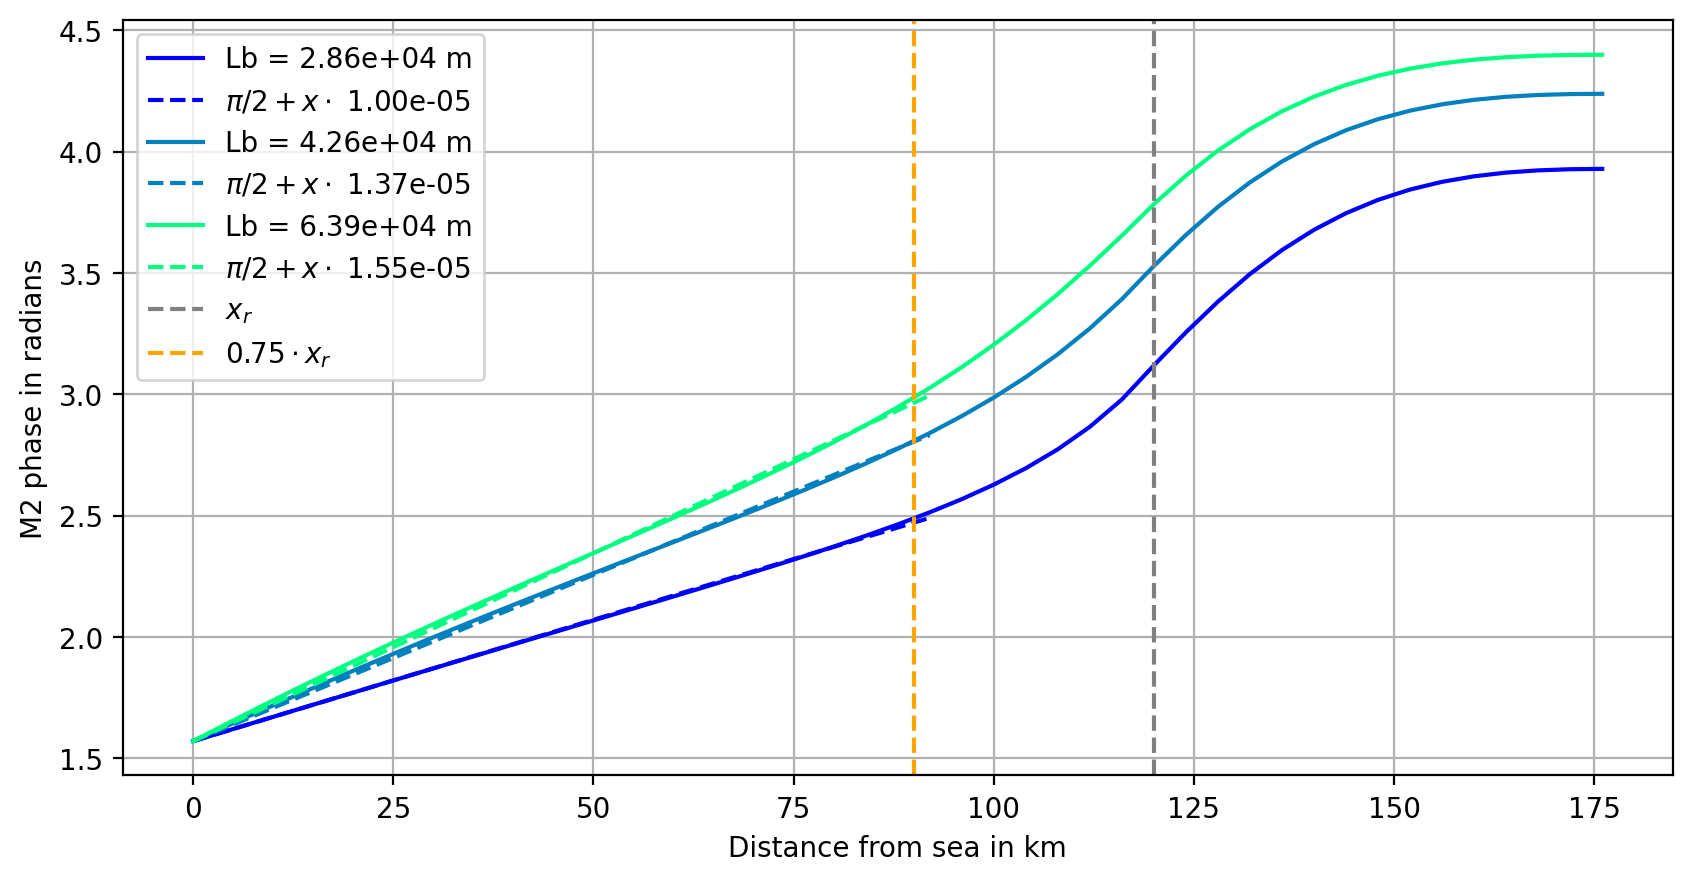

In [236]:

x = (simulation_dict_2["Position"])
cmap = matplotlib.cm.get_cmap('winter')
rgba = cmap(0.5)
N = len(lb_u_m2amp) - 1

for idx, phase in enumerate(m2phase):
    colorfloat = idx/N
    rgb = cmap(colorfloat)
    phase[phase <= 0] = phase[phase <=0] + 2 * np.pi
    plt.plot(x[:-1]/1e3, phase,label='Lb = {:0.2e} m'.format(Lb_list[idx]), color=rgb)
    plt.plot(x[0:24]/1000, fasespeed(x, k_lb[idx])[0:24], '--', label='$ \pi/2 +  x \cdot $ {:0.2e}'.format(k_lb[idx]), color=rgb)
plt.axvline(x_r/1000, c="gray", ls="--", label='$x_r$')
plt.axvline(0.75*x_r/1000, c="orange", ls="--", label='$0.75 \cdot x_r$')  
plt.legend()
plt.grid()
plt.xlabel("Distance from sea in km")
plt.ylabel("M2 phase in radians")


In [235]:
C_lb = []
for idx, val in enumerate(lb_u_amplitudes):
    
    C_model = omega/k_lb[idx]
    print('C_model for Lb =', np.round(Lb_list[idx], 2) , 'is', C_model, 'm/s')
    C_lb.append(C_model)

for idx, val in enumerate(lb_u_amplitudes):
    C_theory = np.sqrt(g*array[idx])
    print('C_theory for Lb=', round(Lb_list[idx], 2), 'is', C_theory, 'm/s')

C_model for Lb = 28558.83 is 14.05458874845324 m/s
C_model for Lb = 42625.11 is 10.252748302586633 m/s
C_model for Lb = 63937.67 is 9.07620781088064 m/s
C_theory for Lb= 28558.83 is 7.49945659517408 m/s
C_theory for Lb= 42625.11 is 9.231192938347677 m/s
C_theory for Lb= 63937.67 is 11.305856208067569 m/s


In [3]:
h0 = 8.6865365
H_arr = np.array([0.66, 1, 1.5])*h0

In [6]:
sp = g*H_arr
print(np.sqrt(sp))

[ 7.4994566   9.23119294 11.30585621]
